# Data Exploration

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
from pandas_datareader import data as pdr
data = pdr.get_data_yahoo("MTUM", start="2017-01-01", end="2020-01-01")
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,76.459999,75.730003,76.129997,76.080002,284100.0,73.194923
2017-01-04,76.660004,76.239998,76.239998,76.529999,215400.0,73.627861
2017-01-05,76.820000,76.389999,76.540001,76.779999,393500.0,73.868370
2017-01-06,77.370003,76.599998,76.769997,77.220001,248900.0,74.291679
2017-01-09,77.360001,77.080002,77.250000,77.190002,158100.0,74.262848


Visualization of closing price (on row data & log-scale)

C:\Users\dizarnotegui\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


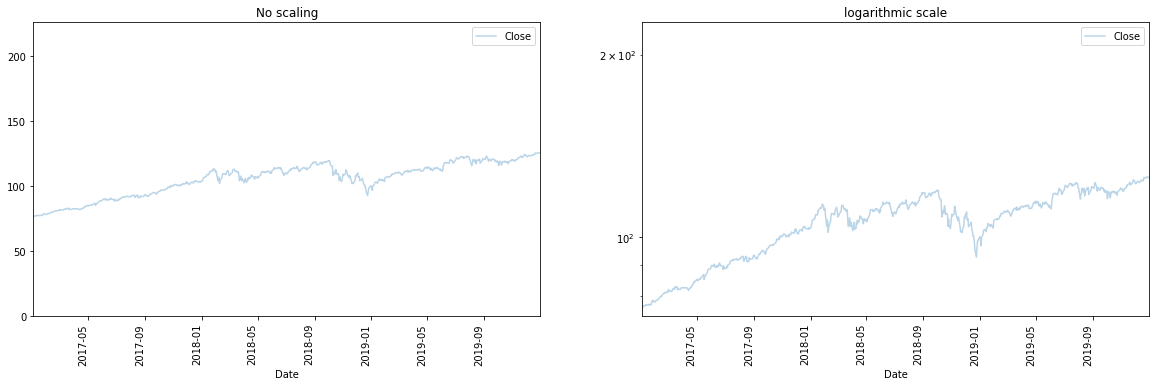

In [30]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = data['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(data['Close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = data['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(data['Close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

Logarithmic price scale—also referred to as log—represents price spacing on the vertical or y-axis dependent on the percentage of change in the underlying asset's price. This is usually the default chart style
A logarithmic price scale is plotted so that the prices in the scale are not positioned equidistantly—equally from one another. Instead, the measure is plotted in such a way that two equal percent changes are plotted as the same vertical distance on the scale.
Most technical analysts and traders use logarithmic price scales.
Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases. They can help you visualize how far the price must move to reach a buy or sell target. However, if prices are close together, logarithmic price scales may render congested and hard to read.

Time Series Decomposition

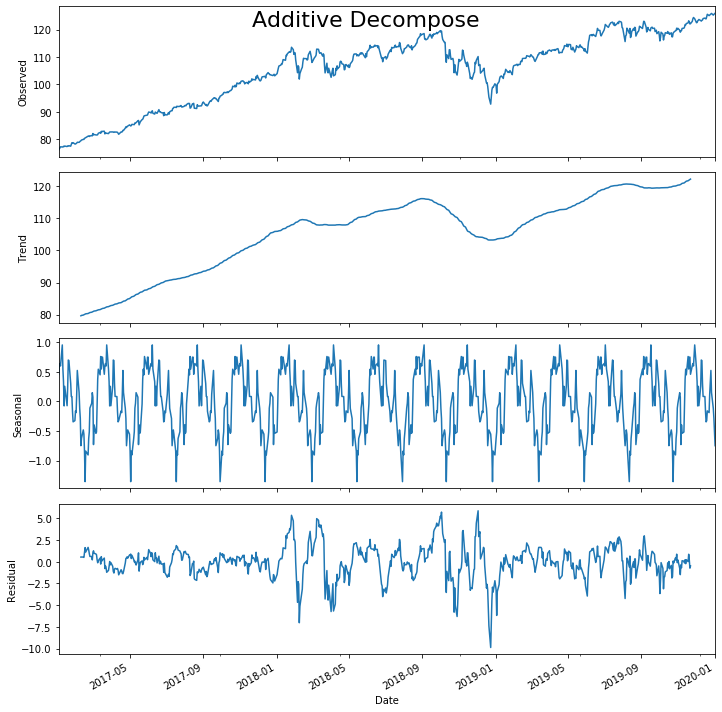

In [39]:
# Additive Decomposition
result_add = seasonal_decompose(data['Close'], model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Stationarity Tests

In [43]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(data['Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(data['Close'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5893916991382522
p-value: 0.48892020941135944
Critial Values:
   1%, -3.439146171679794
Critial Values:
   5%, -2.865422101274577
Critial Values:
   10%, -2.568837245865348

KPSS Statistic: 2.992897
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\dizarnotegui\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

On the other hand, the KPSS test, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test.  

The above code implements these two tests using Augmented Dickey-Fuller and KPSS tests on the MTUM's close price.

Lag Plot - Checking whether time series is random or not

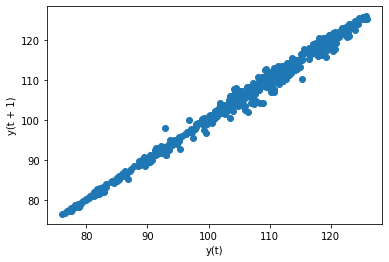

In [35]:
from pandas.plotting import lag_plot
lag_plot(data['Close'])

As we see the graph above, this suggests the non-random pattern (graph is poistively linear).
Non-randomness in the data reveals that we could use, for example, an autoregressive model.

Autocorrelation

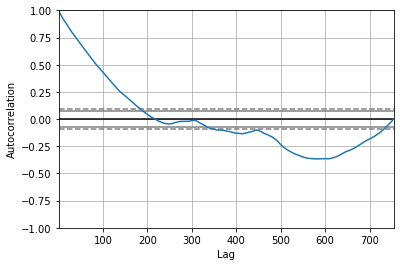

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1 withe respect to expectation, autocrrelation is used.

A black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days and lags > 500 days. (lag 0 is always 1 corrleation)

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero

# So far, we did some data analysis on the close price. Let see what happen when we work on the returns, which include a first value differentiation

In [45]:
#Returns

rtn = data['Close'].pct_change()[1:]
rtn.head()

Date
2017-01-04    0.005915
2017-01-05    0.003267
2017-01-06    0.005731
2017-01-09   -0.000388
2017-01-10   -0.000518
Name: Close, dtype: float64

C:\Users\dizarnotegui\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


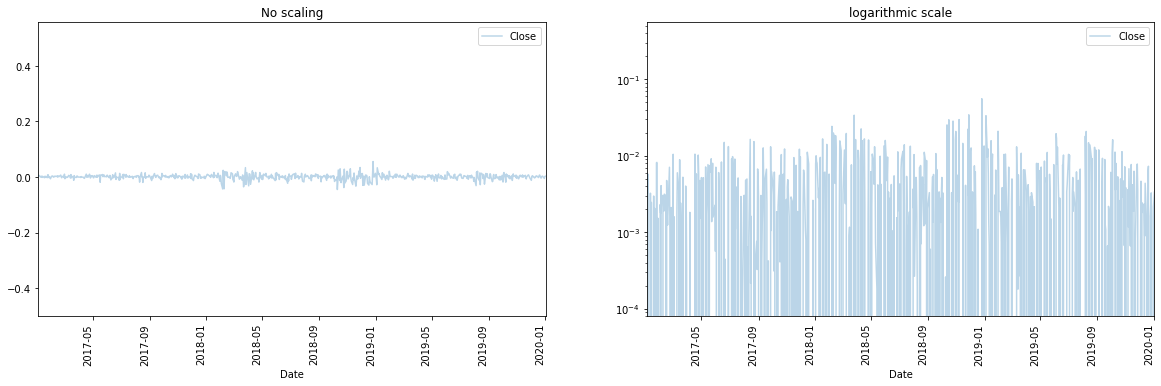

In [47]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = rtn.plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(-0.5, np.max(rtn + 0.5))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = rtn.plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(-0.5, np.max(rtn + 0.5))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

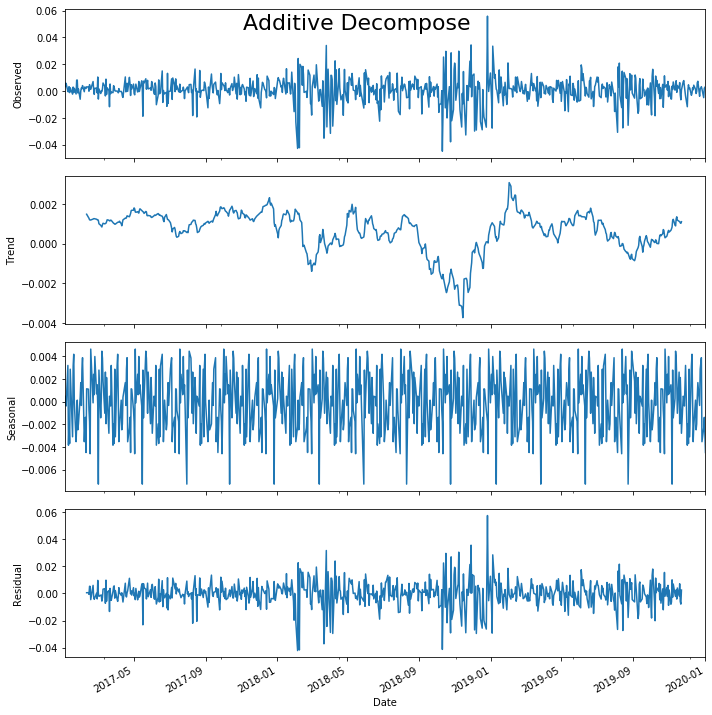

In [48]:
# Additive Decomposition
result_add = seasonal_decompose(rtn, model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [49]:
#Statistical Test

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(rtn, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(rtn, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.194690779069312
p-value: 2.3221512553756052e-20
Critial Values:
   1%, -3.439146171679794
Critial Values:
   5%, -2.865422101274577
Critial Values:
   10%, -2.568837245865348

KPSS Statistic: 0.196245
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\dizarnotegui\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


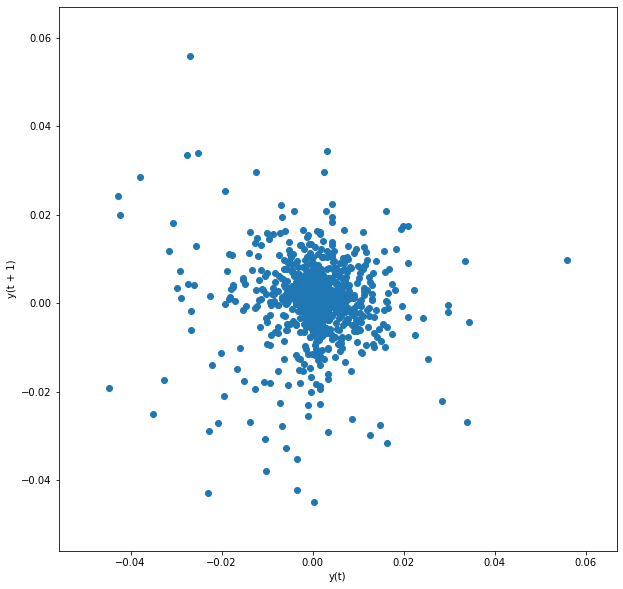

In [50]:
#Lag Plot

from pandas.plotting import lag_plot
lag_plot(rtn)

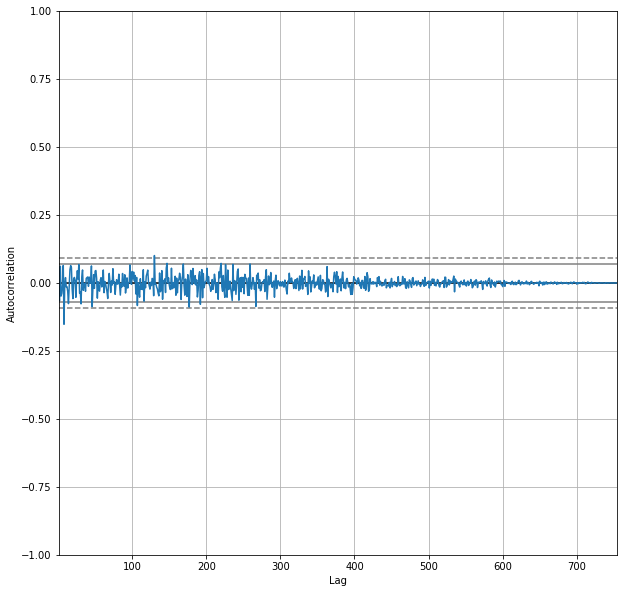

In [51]:
#Autocorrelation

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(rtn)